## Support Vector Machine

##### Resource
math explanation: 
___  
1.https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tr-98-14.pdf
2.http://web.cs.iastate.edu/~honavar/smo-svm.pdf
3.https://ai6034.mit.edu/wiki/images/SVM_and_Boosting.pdf

smo implementation:
___
https://github.com/LasseRegin/SVM-w-SMO/blob/master/SVM.py


In [45]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

DIM = 2
COLORS = ['red', 'blue']

In [46]:
# 2-D mean of ones
M1 = np.ones((DIM,))
# 2-D mean of threes
M2 = 3 * np.ones((DIM,))
# 2-D covariance of 0.3
C1 = np.diag(0.3 * np.ones((DIM,)))
# 2-D covariance of 0.2
C2 = np.diag(0.2 * np.ones((DIM,)))

def generate_gaussian(m, c, num):
    return np.random.multivariate_normal(m, c, num)

def plot_data_with_labels(x, y):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        plt.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])
    plt.show()

NUM = 50

x (100, 2) y (100,)
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


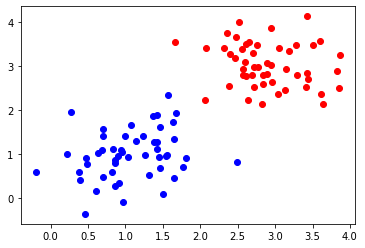

In [47]:
# generate 50 points from gaussian 1
x1 = generate_gaussian(M1, C1, NUM)
# labels
y1 = np.ones((x1.shape[0],))
# generate 50 points from gaussian 2
x2 = generate_gaussian(M2, C2, NUM)
y2 = -np.ones((x2.shape[0],))
# join
x = np.concatenate((x1, x2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)
print('x {} y {}'.format(x.shape, y.shape))
print(y)
plot_data_with_labels(x, y)
# write
with open('gaussiandata.pickle', 'wb') as f:
    pickle.dump((x, y), f)

### Training and calculate alphas

In [48]:
def fit(x, y): 
    NUM = x.shape[0]
    DIM = x.shape[1]
    # we'll solve the dual
    # obtain the kernel
    K = y[:, None] * x
    K = np.dot(K, K.T)
    P = matrix(K)
    q = matrix(-np.ones((NUM, 1)))
    G = matrix(-np.eye(NUM))
    h = matrix(np.zeros(NUM))
    A = matrix(y.reshape(1, -1))
    b = matrix(np.zeros(1))
    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    return alphas

In [49]:
# fit svm classifier
alphas = fit(x, y)

# get weights
w = np.sum(alphas * y[:, None] * x, axis = 0)
# get bias
cond = (alphas > 1e-4).reshape(-1)
b = y[cond] - np.dot(x[cond], w)
bias = b[0]

In [50]:
def plot_data_with_labels(x, y, ax):
    unique = np.unique(y)
    for li in range(len(unique)):
        x_sub = x[y == unique[li]]
        ax.scatter(x_sub[:, 0], x_sub[:, 1], c = COLORS[li])

def plot_separator(ax, w, b):
    slope = -w[0] / w[1]
    intercept = -b / w[1]
    x = np.arange(0, 6)
    ax.plot(x, x * slope + intercept, 'k-')

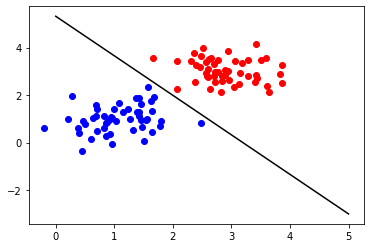

In [51]:
# show data and w
fig, ax = plt.subplots()
plot_separator(ax, w, bias)
plot_data_with_labels(x, y, ax)
plt.show()